In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Load the CSV file
data = pd.read_csv("faces.csv")

#Split to X, Y
X = data.iloc[:, :-2].values # Select all columns except last 2 as X values
X=np.array(X)
Y = data.iloc[:, -2:].values # Select last 2 columns as Y values
Y = Y[:, 0]
Y=np.array(Y)

In [3]:
X

array([[138, 135, 127, ...,   1,   1,   0],
       [ 71,  56,  67, ..., 247, 243, 238],
       [ 84,  97,  72, ..., 114, 194, 241],
       ...,
       [ 29,  29,  29, ..., 145, 147, 141],
       [ 49,  55,  76, ..., 186, 176, 161],
       [ 31,  26,  28, ...,  34,  42,  69]], dtype=int64)

In [4]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [5]:
Y

array([1, 3, 3, ..., 7, 3, 5])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

In [7]:
known_labels = np.unique(Y_test)
unknown_labels = np.setdiff1d(Y_train, known_labels)
mask = np.isin(Y_train, unknown_labels, invert=True)
X_train_filtered = X_train[mask]
Y_train_filtered = Y_train[mask]

In [8]:
svc = SVC(kernel='poly', degree=2, C=10)

svc.fit(X_train_filtered, Y_train_filtered)
accuracy = svc.score(X_test, Y_test)
print("SVM classifier accuracy:", accuracy)

SVM classifier accuracy: 0.8555555555555555


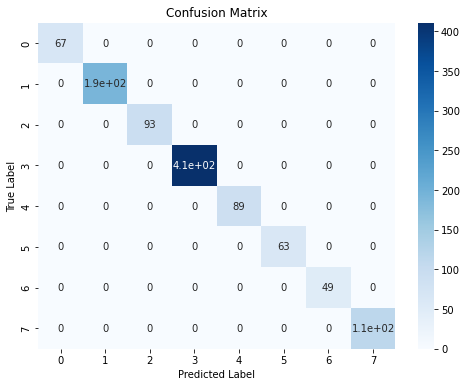

In [9]:
# train confusion matrix
y_predTr = svc.predict(X_train)
conf_matrixTr= confusion_matrix(Y_train, y_predTr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixTr, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

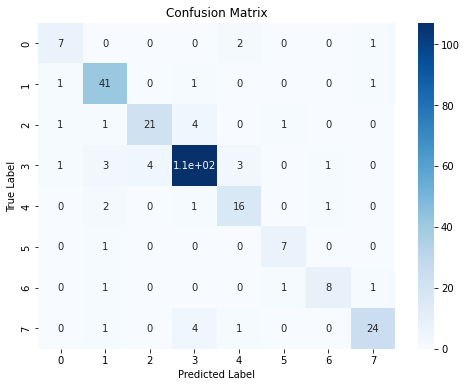

In [10]:
# test confusion matrix
y_predTe = svc.predict(X_test)
conf_matrixTe= confusion_matrix(Y_test, y_predTe)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixTe, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
parameters = {'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'C': [0.1, 1, 10, 100]}

svc = SVC()

grid_search = GridSearchCV(svc, parameters, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'kernel': ['poly']},
             scoring='accuracy')

In [12]:
# Print the classification report for the test data using the best model
y_pred = grid_search.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.82      0.93      0.87        44
           2       0.84      0.75      0.79        28
           3       0.91      0.90      0.91       119
           4       0.73      0.80      0.76        20
           5       0.78      0.88      0.82         8
           6       0.80      0.73      0.76        11
           7       0.89      0.80      0.84        30

    accuracy                           0.86       270
   macro avg       0.81      0.81      0.81       270
weighted avg       0.86      0.86      0.86       270



D:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


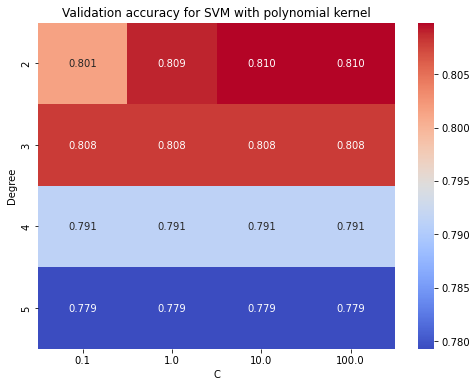

In [13]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_degree', 'param_C', 'mean_test_score']]
results_pivot = results.pivot('param_degree', 'param_C', 'mean_test_score')

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(results_pivot, annot=True, fmt='.3f', cmap='coolwarm', ax=ax)
ax.set_title('Validation accuracy for SVM with polynomial kernel')
ax.set_xlabel('C')
ax.set_ylabel('Degree')
plt.show()

In [81]:
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
Best accuracy:  0.8311369509043928
